The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.

If the exchange rate of the euro to the US dollar is 1.5, you get 1.5 US dollars if you pay 1.0 euro (one euro has more value than one US dollar at this exchange rate).

Daria Chemkaeva put together the data set and made it available on Kaggle — the data source is the European Central Bank. Note that the dataset gets regular updates — we downloaded it on January 2021.

In [2]:
# importing pandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.style as style

In [3]:
# Reading in the dataset and understanding the structure
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

Our focus in the guided part of the project will be on the exchange rate between the Euro and the Russian Rouble.
Also let's clean up the data so we can focus more on the graph part of this project.

In [4]:
# Renaming the columns, changing the data type and sorting out time

exchange_rates.rename(columns={'[Russian rouble ]': 'Russian_rouble',
                               'Period\\Unit:': 'Time'},
                      inplace=True)
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
exchange_rates.sort_values('Time', inplace=True)
exchange_rates.reset_index(drop=True, inplace=True)

In [5]:
# Isolating columns

euro_to_rouble = exchange_rates[['Time','Russian_rouble']].copy()

In [6]:
euro_to_rouble['Russian_rouble'].value_counts()

-          62
40.6500     4
40.5950     4
43.9800     4
35.2250     4
           ..
26.4195     1
73.3737     1
33.3038     1
70.6272     1
86.3711     1
Name: Russian_rouble, Length: 5413, dtype: int64

In [8]:
# dropping the rows where '-' character appears and converting the column to float
euro_to_rouble = euro_to_rouble[euro_to_rouble['Russian_rouble'] != '-']
euro_to_rouble['Russian_rouble'] = euro_to_rouble['Russian_rouble'].astype(float)

Let's generate a line plot to visualize the evolution of the euro-dollar exchange rate.

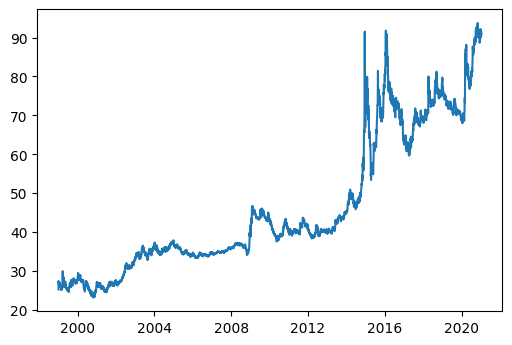

In [11]:
plt.plot(euro_to_rouble['Time'], euro_to_rouble['Russian_rouble'])
plt.show()

Let's clean up the graph a little to make it more smooth and understandable

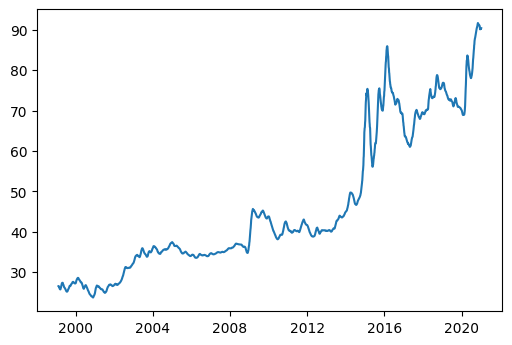

In [15]:
# figuring out the rolling mean of 30 days and showing it in the graph
euro_to_rouble['rolling_mean'] = euro_to_rouble['Russian_rouble'].rolling(30).mean()
plt.plot(euro_to_rouble['Time'],euro_to_rouble['Russian_rouble'].rolling(30).mean())
plt.show()

Let's see how euro-rouble rate has changed during the start of the sanctions in 2014 and the consequent struggles. We'll take the period of 2014 to the end of 2019. We can use a line plot.

In [57]:
# Grabbing the necessary data
sanctions = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2014
                   ) & (euro_to_rouble['Time'].dt.year <= 2019)]

sanctions_4_5 = euro_to_rouble.copy(
                   )[(euro_to_rouble['Time'].dt.year >= 2015
                   ) & (euro_to_rouble['Time'].dt.year <= 2016)]

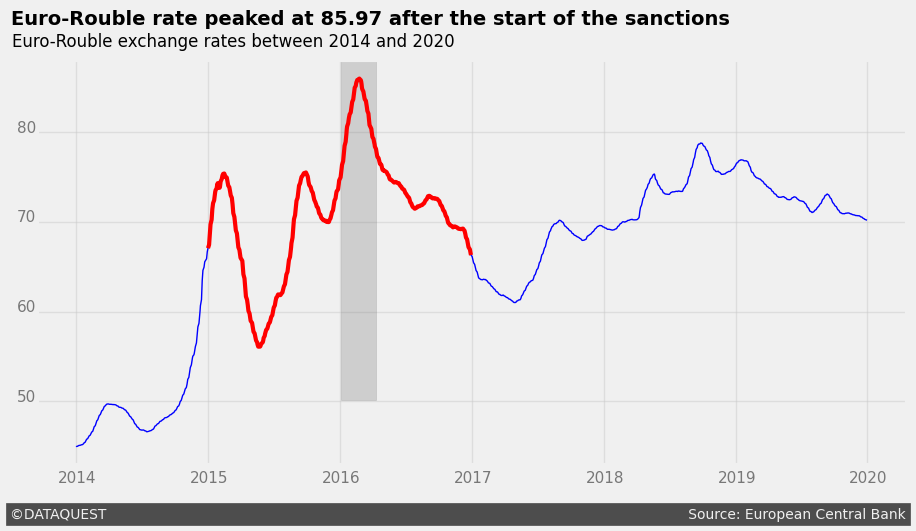

In [133]:
# Importing the style
style.use('fivethirtyeight')

# Adding the plot
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(sanctions['Time'],
        sanctions['rolling_mean'],
        linewidth=1, color='b')

# Highlight the years

ax.plot(sanctions_4_5['Time'],
        sanctions_4_5['rolling_mean'],
        linewidth=3, color='r')

# Highlight the peak

ax.axvspan(xmin=735969.0, xmax=736066.0, ymin=0.161, ymax=0.999,
           alpha=0.3, color='grey')

# Adding separate tick labels

ax.set_xticklabels([])
ax.set_yticklabels([])

x = 735185.0
for year in ['2014', '2015', '2016', '2017', '2018', '2019', '2020']:
    ax.text(x, 41, year, alpha=0.5, fontsize=11)
    x += 365

y = 50.0   
for rate in ['50', '60', '70', '80']:
    ax.text(735072.0, y, rate, alpha=0.5, fontsize=11)
    y += 10
    
# Adding a title and a subtitle    
ax.text(735055.0, 92, "Euro-Rouble rate peaked at 85.97 after the start of the sanctions",
        weight='bold')
ax.text(735056.4, 89.5, 'Euro-Rouble exchange rates between 2014 and 2020',
        size=12)

# Adding a signature
ax.text(735052.0, 37, '©DATAQUEST' + ' '*133 + 'Source: European Central Bank',
        color = '#f0f0f0', backgroundcolor = '#4d4d4d',
        size=10)

# Add some transparency to the grid
ax.grid(alpha=0.5)

plt.show()